In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
calories=pd.read_csv('C:\Users\Jimmy\Downloads\Calories Burnt Prediction\Data\calories.csv')


In [ ]:
calories = calories.drop("User_ID", axis=1)

In [ ]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Calories  15000 non-null  float64
dtypes: float64(1)
memory usage: 117.3 KB


In [ ]:
exercise=pd.read_csv('C:\Users\Jimmy\Downloads\Calories Burnt Prediction\Data\exercise.csv')

df=pd.concat([exercise,calories['Calories']],axis=1)

In [ ]:
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
df=df.drop('User_ID',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [ ]:
gender_mapping = {'male': 1, 'female': 0}
df['Gender'] = df['Gender'].map(gender_mapping)

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  int64  
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 937.6 KB


,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


Data Visualization

<Axes: xlabel='Age', ylabel='Density'>

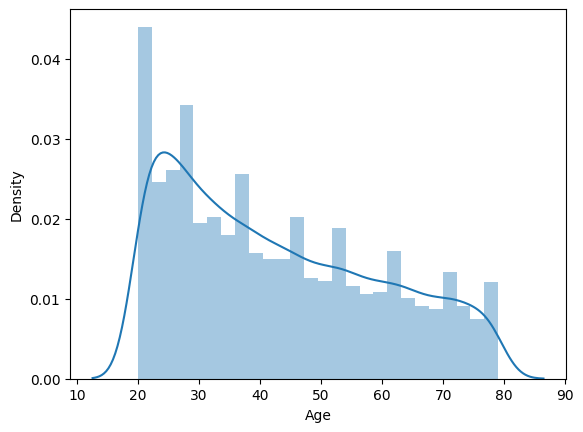

In [ ]:
sns.distplot(df['Age'])

Calories      1.000000
Duration      0.955421
Heart_Rate    0.897882
Body_Temp     0.824558
Age           0.154395
Weight        0.035481
Gender        0.022357
Height        0.017537
Name: Calories, dtype: float64


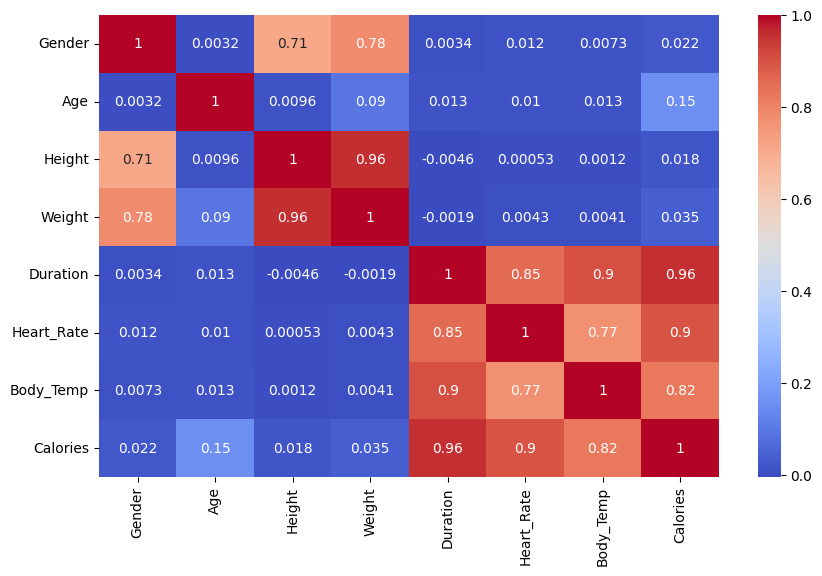

In [ ]:
correlation = df.corr()['Calories'].sort_values(ascending=False)

print(correlation)

# Heatmap (optional)
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# Split data
X = df.drop('Calories', axis=1)
y = df['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Models to try
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

# Train and evaluate
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"\n{name}:")
    print(f"  MAE: {mae:.2f}")
    print(f"  MSE: {mse:.2f}")
    print(f"  RMSE: {rmse:.2f}")
    print(f"  R²: {r2:.2f}")


Linear Regression:
  MAE: 8.44
  MSE: 132.00
  RMSE: 11.49
  R²: 0.97

Ridge Regression:
  MAE: 8.44
  MSE: 132.00
  RMSE: 11.49
  R²: 0.97

Lasso Regression:
  MAE: 8.87
  MSE: 143.83
  RMSE: 11.99
  R²: 0.96

Decision Tree:
  MAE: 3.41
  MSE: 27.89
  RMSE: 5.28
  R²: 0.99

Random Forest:
  MAE: 1.69
  MSE: 7.02
  RMSE: 2.65
  R²: 1.00

XGBoost:
  MAE: 1.50
  MSE: 4.57
  RMSE: 2.14
  R²: 1.00


In [ ]:
import joblib

best_model = XGBRegressor()
best_model.fit(X_train, y_train)

# Save model
joblib.dump(best_model, "calories_model.pkl")


['calories_model.pkl']